# Summary Tides Analysis

| where | Lat | type | season <br> [Northern emisphere] | max_registered_amplitude [m] | dominant_components |other_components |
| - | - |-|-|-|-|-| 
| Honolulu | 21.3 |ocean| summer |0.507| 25.71 h <br> 24 h <br> 12.41 h| 12 h <br> 720 h|
| Saint-Malo | 48.6 |ocean coast| winter|5.724|12.41 h <br> 12 h  | 72 h  <br>  25.71 h <br> 24 h <br> 6.21 h <br> 6.10 h|
| Lampedusa | 35.5 | closed basin | winter |0.257| 720 h <br> 12.41 h <br> 12 h| 120 h <br>  25.71 h <br>  24 h  |
| Lampedusa | 35.5 | closed basin | summer |0.266| 12.41 h <br> 12 h| 720 h <br>  120 h <br> 25.71 h <br>  24 h |
| Kerguelen <br> Islands | -49.3 |ocean | summer |1.083|  12.41 h | 24 h <br> 12 h |
| Yakutat | 59.5 | ocean coast | winter |2.182| 24 h <br> 12.41 h| 720 h <br> 25.71 h  <br> 12 h |


In [1]:
#import essential libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#parameter to use Latex in matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
#a plot label should be easy to read
plt.rcParams.update({'font.size': 14})

I would normalize all the dfts to highlight the relative heights of the peaks, but since tides can be 20x times stronger depending on the place, this would make the compared plots more difficult to look at. Thus i choose not to normalize dfts.

In [30]:
def PlotOnePlaceNorm(file_path, axs, ax_index):

    data = np.loadtxt(file_path, skiprows=1)

    # Plot the original signal
    axs[ax_index].scatter(data[:,0], data[:,1], s=0.05)
    #axs[0].set_xlim(0,2000)    
    #axs[0].set_title('Original Signal')
    axs[ax_index].set_xlabel('Time (min)')
    axs[ax_index].set_ylabel('Amplitude')

    # Plot the frequency spectrum
    norm = np.sum(np.abs(data[:,3][:len(data[:,1])//2]))
    axs[ax_index+1].plot(data[:,2][:len(data[:,1])//2], np.abs(data[:,3][:len(data[:,1])//2]) / np.sum(np.abs(data[:,3][:len(data[:,1])//2])))
    axs[ax_index+1].set_xscale('log')
    #axs[ax_index+1].set_title('Frequency Spectrum')
    axs[ax_index+1].set_xlabel('Frequency (1/min)')
    axs[ax_index+1].set_ylim(-0.01,0.22) 
   # axs[ax_index+1].set_ylabel('Amplitude')

In [33]:
def PlotOnePlace(file_path, axs, ax_index, title):

    data = np.loadtxt(file_path, skiprows=1)

    # Plot the original signal
    axs[ax_index].scatter(data[:,0], data[:,1], s=0.05)
    #axs[0].set_xlim(0,2000)    
    #axs[0].set_title('Original Signal')
    axs[ax_index].set_xlabel('Time [min]')
    axs[ax_index].set_ylabel(title)

    # Plot the frequency spectrum
    norm = 1
    axs[ax_index+1].plot(data[:,2][:len(data[:,1])//2], np.abs(data[:,3][:len(data[:,1])//2]) / np.sum(np.abs(data[:,3][:len(data[:,1])//2])))
    axs[ax_index+1].set_xscale('log')
    #axs[ax_index+1].set_title('Frequency Spectrum')
    axs[ax_index+1].set_xlabel('Frequency [1/min]')
    #axs[ax_index+1].set_ylim(-0.01,0.22) 
   # axs[ax_index+1].set_ylabel('Amplitude')

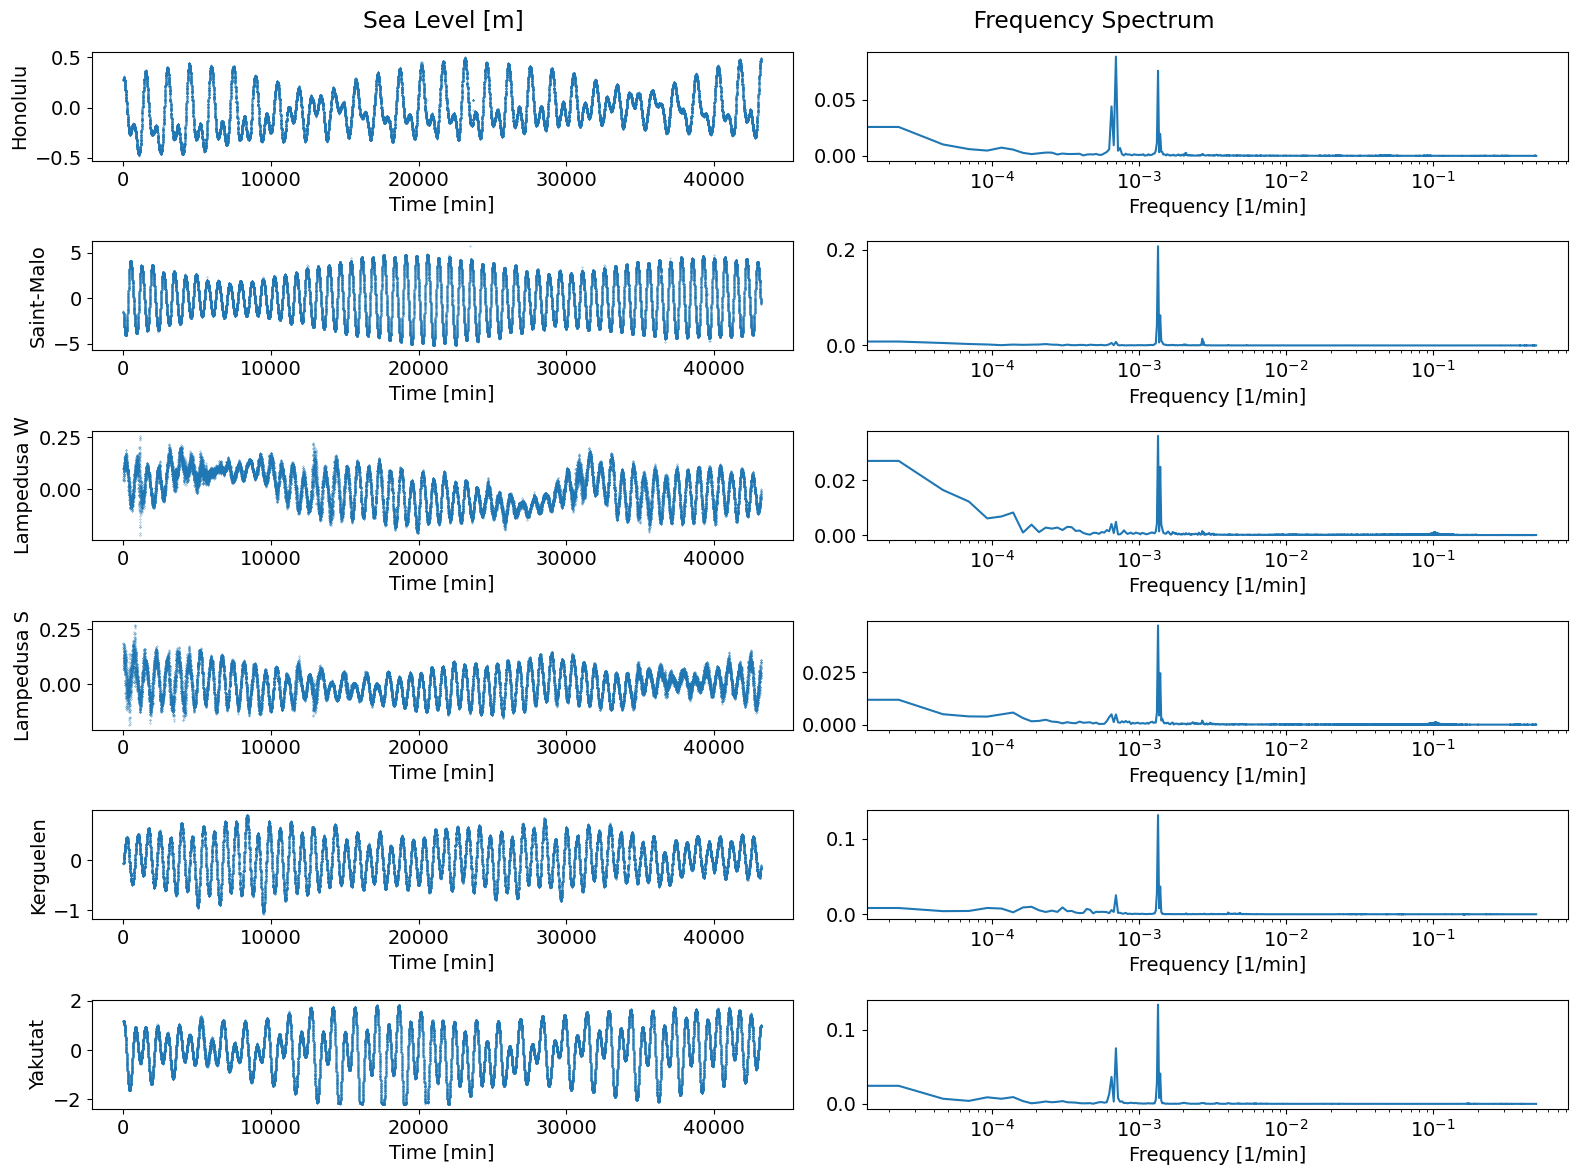

In [43]:
# Create subplots
fig, axs = plt.subplots(6, 2, figsize=(16, 12))
plt.suptitle("Sea Level [m]                                                             Frequency Spectrum")
axs = axs.flatten()

files=["HonoluluResults.txt", "SaintMaloResults.txt", "LampWintResults.txt", "LampSummResults.txt", "KerguelenResults.txt", "YakutatResults.txt"]
titles=["Honolulu", "Saint-Malo", "Lampedusa W", "Lampedusa S", "Kerguelen", "Yakutat"]

for i in range(len(files)):
    PlotOnePlace(files[i], axs, 2*i, titles[i])


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [44]:
def max_registered_amplitude(file_path): 
    data = np.loadtxt(file_path, skiprows=1)
    return np.max(np.abs(data[:,1]))

In [45]:
mra=np.zeros(len(files))
for i,file in enumerate(files):
    mra[i]=max_registered_amplitude(file)

In [46]:
mra

array([0.50653447, 5.72390925, 0.25722533, 0.26651067, 1.08205919,
       2.18151853])

I don't understand the 720 h and 120 h tides mechanism  (if they are tides...)

fasi m2 ... nella tabella
mappa
commento?
studiare le maree